In [2]:
import pandas as pd
import numpy as np
import nltk
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

In [3]:
from google.colab import files
uploaded=files.upload()

Saving KGF2 20data.csv to KGF2 20data.csv


In [4]:
import io

In [5]:
uploaded

{'KGF2 20data.csv': b'Title,Score,Name,Date,actions,text\n" The Finest Part 2 ever\n",10,sammyaklagade,14-Apr-22,"\n                    182 out of 211 found this helpful.\n                        \n                            Was this review helpful?  Sign in to vote.\n                        \n                        \n                    Permalink\n                ","This will go down as the greatest Indian films ever, Storyline was more sublime than ever Grand performance from Yash, bit illogical fights but yes anything comes under fiction and if you\'re getting a story like this then nothing comes close KGF 2 - surely A MASTERPIECE."\n" Paisa Vasool movie - KGF Chapter 2\n",10,arjuncshekartheofficial,14-Apr-22,"\n                    141 out of 168 found this helpful.\n                        \n                            Was this review helpful?  Sign in to vote.\n                        \n                        \n                    Permalink\n                ","KGF Chapter 1 mov

In [6]:
df=pd.read_csv('KGF2 20data.csv')

In [7]:
df.head(10)

,Title,Score,Name,Date,actions,text
0,The Finest Part 2 ever\n,10.0,sammyaklagade,14-Apr-22,\n 182 out of 211 found thi...,This will go down as the greatest Indian films...
1,Paisa Vasool movie - KGF Chapter 2\n,10.0,arjuncshekartheofficial,14-Apr-22,\n 141 out of 168 found thi...,"KGF Chapter 1 movie was just a Trailer, But th..."
2,KGF 2 Box Office Tsunami Is Coming\n,10.0,rosheenkan,14-Apr-22,\n 87 out of 107 found this...,"As expected, KGF 2 is getting positive respons..."
3,Goosebumps overloaded!!\n,9.0,sriramthestranger,14-Apr-22,\n 92 out of 115 found this...,"The screenplay, cuts and sound effects deserve..."
4,Expectations surpassed!\n,10.0,Prashast_Singh,15-Apr-22,\n 69 out of 86 found this ...,"""Hindi viewers, please don't regret later on w..."
5,MASTERPIECE OF INDIAN CINEMA\n,10.0,DrRaj2012,14-Apr-22,\n 74 out of 90 found this ...,Watched 7 am show.\n\nCan't compare with any H...
6,KGF - Chapter 2 is The Super-Duper Blockbuste...,10.0,rahul000994,15-Apr-22,\n 44 out of 55 found this ...,"KGF - Chapter 1, set the tone for a slick gang..."
7,KGF is KANNADA's GOLD FILM\n,9.0,PavanKV,14-Apr-22,\n 55 out of 70 found this ...,"KFF part 2- Boisterous, loud and machismo type..."
8,Awesome\n,10.0,yashrajpanda-91825,14-Apr-22,\n 78 out of 92 found this ...,It is one of the best movies and a history for...
9,Action Dhamakaaaa\n,10.0,mohantabiswa,14-Apr-22,\n 51 out of 65 found this ...,Blockbuster movie.. Wellmade action sequences....


In [8]:
df.tail(10)

,Title,Score,Name,Date,actions,text
1069,Superb\n,10.0,omkartamse,15-Apr-22,\n 0 out of 0 found this he...,"Worth waiting for 4 years, worth every penny. ..."
1070,Wonderful entertainment\n,10.0,prasanthmech-91763,16-Apr-22,\n 0 out of 1 found this he...,"Good choreography, direction, cinematography, ..."
1071,Amazing Movie\n,10.0,raghuprashanth,16-Apr-22,\n 0 out of 0 found this he...,"The screenplay, cuts and sound effects deserve..."
1072,"Solid cinematography, vfx, action scenes and ...",9.0,amitshah-44628,15-Apr-22,\n 0 out of 0 found this he...,"Everything was spot on, good movie - just a li..."
1073,International standard movie\n,10.0,ganeshhk-79735,15-Apr-22,\n 0 out of 0 found this he...,No doubt its a masterpiece Next level movie Ro...
1074,Just what I want indian cinema be ...in future\n,10.0,nishantjadhavnj,16-Apr-22,\n 0 out of 1 found this he...,Mind-blowing What I saw on screen was the conv...
1075,Good but unbelievable story misuse the name o...,7.0,naibedyatripathy,15-Apr-22,\n 0 out of 0 found this he...,Good movie but some parts lack the originality...
1076,This is now crazy🔥\n,10.0,surajrenake,15-Apr-22,\n 0 out of 0 found this he...,Uff! The movie started with goosebumps and end...
1077,Rocky Vai On Fire 🔥\n,10.0,nahidhassan-42870,14-Apr-22,\n 0 out of 0 found this he...,#KGFChapter2 This movie has a hype which i hav...
1078,"Amazing - Hollywood, May I Come In..\n",10.0,yesh-16550,18-Apr-22,\n 0 out of 0 found this he...,First Time an India Movie will sweep all the A...


In [9]:
df.shape

(1079, 6)

In [10]:
df.columns

Index(['Title', 'Score', 'Name', 'Date', 'actions', 'text'], dtype='object')

In [11]:
df.isnull().sum()

Title      0
Score      5
Name       0
Date       0
actions    0
text       0
dtype: int64

In [12]:
df.describe(include='all')

,Title,Score,Name,Date,actions,text
count,1079,1074.000000,1079,1079,1079,1079
unique,1015,NaN,1079,5,121,1062
top,Awesome\n,NaN,sammyaklagade,14-Apr-22,\n 0 out of 0 found this he...,This will go down as the greatest Indian films...
freq,8,NaN,1,440,566,6
mean,NaN,9.304469,NaN,NaN,NaN,NaN
std,NaN,1.998471,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,10.000000,NaN,NaN,NaN,NaN
50%,NaN,10.000000,NaN,NaN,NaN,NaN
75%,NaN,10.000000,NaN,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Title    1079 non-null   object 
 1   Score    1074 non-null   float64
 2   Name     1079 non-null   object 
 3   Date     1079 non-null   object 
 4   actions  1079 non-null   object 
 5   text     1079 non-null   object 
dtypes: float64(1), object(5)
memory usage: 50.7+ KB


In [14]:
df['Score'].value_counts()

10.0    889
9.0      62
1.0      36
8.0      23
6.0      18
7.0      16
4.0      11
2.0       8
5.0       6
3.0       5
Name: Score, dtype: int64

In [15]:
pd.crosstab(df['Date'],df['Score'])

Score,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Date,,,,,,,,,,
14-Apr-22,7,2,2,0,3,6,2,6,18,392
15-Apr-22,5,3,1,4,0,4,2,5,18,200
16-Apr-22,9,0,1,2,2,4,6,6,13,127
17-Apr-22,11,1,1,3,0,1,3,4,10,112
18-Apr-22,4,2,0,2,1,3,3,2,3,58


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [17]:
plt.figure(figsize=(18,10))


<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

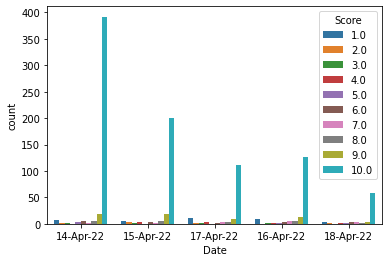

In [18]:
sns.countplot(x="Date",hue="Score",data=df)

In [19]:
data_1 = df.drop(['Title','Name','Date','actions'],axis=1)

In [20]:
data_1 = data_1.dropna(axis=0)

In [21]:
data_1.shape

(1074, 2)

In [22]:
data_1.head(10)

,Score,text
0,10.0,This will go down as the greatest Indian films...
1,10.0,"KGF Chapter 1 movie was just a Trailer, But th..."
2,10.0,"As expected, KGF 2 is getting positive respons..."
3,9.0,"The screenplay, cuts and sound effects deserve..."
4,10.0,"""Hindi viewers, please don't regret later on w..."
5,10.0,Watched 7 am show.\n\nCan't compare with any H...
6,10.0,"KGF - Chapter 1, set the tone for a slick gang..."
7,9.0,"KFF part 2- Boisterous, loud and machismo type..."
8,10.0,It is one of the best movies and a history for...
9,10.0,Blockbuster movie.. Wellmade action sequences....


In [23]:
x=0
for i in data_1['Score']:
  if i>7:
    i=2
  elif i<8 and i>4:
    i=1
  else:
    i=0
  data_1['Score'][x]=i
  x=x+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [24]:
data_1=data_1.drop(labels=range(1074,1079),axis=0)

In [25]:
data_1.tail(10)

,Score,text
1064,2.0,EXCELLENT ACTION PACKED MOVIE.\n\nElevation is...
1065,2.0,This movie has even surpassed the hype we had ...
1066,2.0,KGF chapter2 is not just a movie it's an emoti...
1067,2.0,Emotions + Elevations + Action!!\n\nThat's KGF...
1068,2.0,Brilliant screenplay and bgm.\n\nAs a villain ...
1069,2.0,"Worth waiting for 4 years, worth every penny. ..."
1070,1.0,"Good choreography, direction, cinematography, ..."
1071,2.0,"The screenplay, cuts and sound effects deserve..."
1072,2.0,"Everything was spot on, good movie - just a li..."
1073,2.0,No doubt its a masterpiece Next level movie Ro...


In [26]:
def remove_htmltext(text):
  soup = BeautifulSoup(text,'lxml')
  html_free=soup.get_text()
  return html_free

In [27]:
data_1['text']=data_1['text'].apply(lambda x: remove_htmltext(x))

In [28]:
data_1.head()

,Score,text
0,2.0,This will go down as the greatest Indian films...
1,2.0,"KGF Chapter 1 movie was just a Trailer, But th..."
2,2.0,"As expected, KGF 2 is getting positive respons..."
3,2.0,"The screenplay, cuts and sound effects deserve..."
4,2.0,"""Hindi viewers, please don't regret later on w..."


In [29]:
def remove_punctuation(text):
  no_punct = "".join([c for c in text if c not in string.punctuation])
  return no_punct